1. Simple Dataset downloading Pipeline

In [2]:
%pip install tensorflow


   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/385.0 MB 8.4 MB/s eta 0:00:46
   ---------------------------------------- 4.7/385.0 MB 11.4 MB/s eta 0:00:34
    --------------------------------------- 7.3/385.0 MB 11.6 MB/s eta 0:00:33
   - -------------------------------------- 10.0/385.0 MB 11.5 MB/s eta 0:00:33
   - -------------------------------------- 12.3/385.0 MB 11.7 MB/s eta 0:00:32
   - -------------------------------------- 14.4/385.0 MB 11.6 MB/s eta 0:00:32
   - -------------------------------------- 16.5/385.0 MB 11.6 MB/s eta 0:00:32
   - -------------------------------------- 18.9/385.0 MB 11.5 MB/s eta 0:00:32
   -- ------------------------------------- 21.2/385.0 MB 11.4 MB/s eta 0:00:32
   -- ------------------------------------- 23.6/385.0 MB 11.4 MB/s eta 0:00:32
   -- ------------------------------------- 26.0/385.0 MB 11.4 MB/s eta 0:00:32
   -- ------------------------------------- 28.3/385

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 2 Lines Download
df_mnist = tf.keras.datasets.mnist

In [11]:
(train_images, train_labels), (validation_images, validation_labels) = df_mnist.load_data()

# 2 Lines Preprocessing
train_images       = train_images      / 255.0
validation_images  = validation_images / 255.0

class_names  = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

5

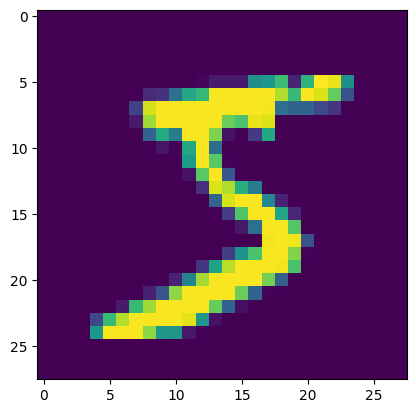

In [8]:
plt.imshow(train_images[0])
train_labels[0]

2. Simple Model Architecture

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

c:\Users\mpstme.student\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

3. Simple Model Training Pipeline

In [13]:
model.fit(x = train_images, y = train_labels, validation_data = (validation_images,  validation_labels), epochs=10)

final_validation_loss, final_validation_acc = model.evaluate(validation_images,  validation_labels, verbose=2)
print('\nValidation accuracy:', final_validation_acc)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8760 - loss: 0.4379 - val_accuracy: 0.9610 - val_loss: 0.1329
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1211 - val_accuracy: 0.9711 - val_loss: 0.0940
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9763 - loss: 0.0805 - val_accuracy: 0.9727 - val_loss: 0.0895
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9753 - val_loss: 0.0808
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0441 - val_accuracy: 0.9746 - val_loss: 0.0797
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9779 - val_loss: 0.0715
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0269 - val_accuracy: 0.9744 - val_loss: 0.0864
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9929 - loss: 0.0226 - 

4. Kaggle Submission 

In [17]:
test_dataset   = pd.read_csv("test.csv")
test_dataset   = test_dataset.values.reshape(-1,28,28,1) / 255.0

In [18]:
predicted_logits  = model.predict(test_dataset)

predicted_probs   = tf.keras.layers.Softmax() ( predicted_logits )
predicted_label   = tf.math.argmax(predicted_probs, axis = 1) 

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step


In [21]:
submissions = pd.read_csv("sample_submission.csv")
# Here we will change the Sample Submission value, to predictions that we have calculate
submissions.Label = predicted_label
submissions.to_csv("submissions_prediction.csv", index=False)